# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [3]:
df = pd.read_csv('telco_customer_churn.csv')
df

,Unnamed: 0.1,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,feedback_length,sentiment,HasFeedback
0,0,0,7590-vhveg,female,0,yes,no,1,no,no phone service,...,month-to-month,yes,electronic check,29.85,29.85,0,NaN,0,0.0,False
1,1,1,5575-gnvde,male,0,no,no,34,yes,no,...,one year,no,mailed check,56.95,1889.50,0,NaN,0,0.0,False
2,2,2,3668-qpybk,male,0,no,no,2,yes,no,...,month-to-month,yes,mailed check,53.85,108.15,1,NaN,0,0.0,False
3,3,3,7795-cfocw,male,0,no,no,45,no,no phone service,...,one year,no,bank transfer (automatic),42.30,1840.75,0,NaN,0,0.0,False
4,4,4,9237-hqitu,female,0,no,no,2,yes,no,...,month-to-month,yes,electronic check,70.70,151.65,1,NaN,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7027,7038,4702-ioqdc,female,0,no,no,1,yes,no,...,month-to-month,yes,electronic check,70.10,70.10,1,NaN,0,0.0,False
7028,7028,7039,9489-jmttn,female,0,yes,yes,72,yes,yes,...,two year,no,credit card (automatic),89.75,6595.90,0,NaN,0,0.0,False
7029,7029,7040,0575-cuqov,male,1,yes,no,60,yes,no,...,one year,yes,electronic check,97.95,5867.00,0,NaN,0,0.0,False
7030,7030,7041,0967-bmlbd,female,0,yes,yes,11,yes,no,...,one year,yes,mailed check,20.00,196.35,0,NaN,0,0.0,False


## Check The Data

In [4]:
df.shape

(7032, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      7032 non-null   int64  
 1   Unnamed: 0        7032 non-null   int64  
 2   customerID        7032 non-null   object 
 3   gender            7032 non-null   object 
 4   SeniorCitizen     7032 non-null   int64  
 5   Partner           7032 non-null   object 
 6   Dependents        7032 non-null   object 
 7   tenure            7032 non-null   int64  
 8   PhoneService      7032 non-null   object 
 9   MultipleLines     7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,7032.0,3515.500000,2030.107879,0.00,1757.7500,3515.500,5273.2500,7031.000
Unnamed: 0,7032.0,3520.737201,2033.431775,0.00,1759.7500,3521.500,5281.2500,7042.000
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.000
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.000
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.750
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.800
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.000
feedback_length,7032.0,86.532708,163.687601,0.00,0.0000,0.000,28.7500,760.000
sentiment,7032.0,0.050175,0.131734,-0.50,0.0000,0.000,0.0000,0.825


In [8]:
df.sample

<bound method NDFrame.sample of       Unnamed: 0.1  Unnamed: 0  customerID  gender  SeniorCitizen Partner  \
0                0           0  7590-vhveg  female              0     yes   
1                1           1  5575-gnvde    male              0      no   
2                2           2  3668-qpybk    male              0      no   
3                3           3  7795-cfocw    male              0      no   
4                4           4  9237-hqitu  female              0      no   
...            ...         ...         ...     ...            ...     ...   
7027          7027        7038  4702-ioqdc  female              0      no   
7028          7028        7039  9489-jmttn  female              0     yes   
7029          7029        7040  0575-cuqov    male              1     yes   
7030          7030        7041  0967-bmlbd  female              0     yes   
7031          7031        7042  6178-kfnhs  female              0      no   

     Dependents  tenure PhoneService     Mu

In [9]:
df.nunique()

Unnamed: 0.1        7032
Unnamed: 0          7032
customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
CustomerFeedback    1758
feedback_length      474
sentiment            715
HasFeedback            2
dtype: int64

## Exploratory Data Analysis

In [10]:
df.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
CustomerFeedback    5274
feedback_length        0
sentiment              0
HasFeedback            0
dtype: int64

In [11]:
df.fillna(0, inplace=True)

In [12]:
df.duplicated().sum()

0

In [15]:
print('Columns in the dataset:')
print(df.columns.tolist())

Columns in the dataset:
['Unnamed: 0.1', 'Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CustomerFeedback', 'feedback_length', 'sentiment', 'HasFeedback']


In [16]:
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
if unnamed_cols:
    df.drop(columns=unnamed_cols, inplace=True)
    print(f"Dropped columns: {unnamed_cols}")

Dropped columns: ['Unnamed: 0.1', 'Unnamed: 0']


In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,feedback_length,sentiment,HasFeedback
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,month-to-month,yes,electronic check,29.85,29.85,0,0,0,0.0,False
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,one year,no,mailed check,56.95,1889.50,0,0,0,0.0,False
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,month-to-month,yes,mailed check,53.85,108.15,1,0,0,0.0,False
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,one year,no,bank transfer (automatic),42.30,1840.75,0,0,0,0.0,False
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,month-to-month,yes,electronic check,70.70,151.65,1,0,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,4702-ioqdc,female,0,no,no,1,yes,no,fiber optic,no,...,month-to-month,yes,electronic check,70.10,70.10,1,0,0,0.0,False
7028,9489-jmttn,female,0,yes,yes,72,yes,yes,dsl,yes,...,two year,no,credit card (automatic),89.75,6595.90,0,0,0,0.0,False
7029,0575-cuqov,male,1,yes,no,60,yes,no,fiber optic,no,...,one year,yes,electronic check,97.95,5867.00,0,0,0,0.0,False
7030,0967-bmlbd,female,0,yes,yes,11,yes,no,no,no internet service,...,one year,yes,mailed check,20.00,196.35,0,0,0,0.0,False


In [21]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod', 'HasFeedback']

print(len(num_cols))
print(len(cat_cols))

5
16


## Visualization

### 1. Histogram Of Num_Cols

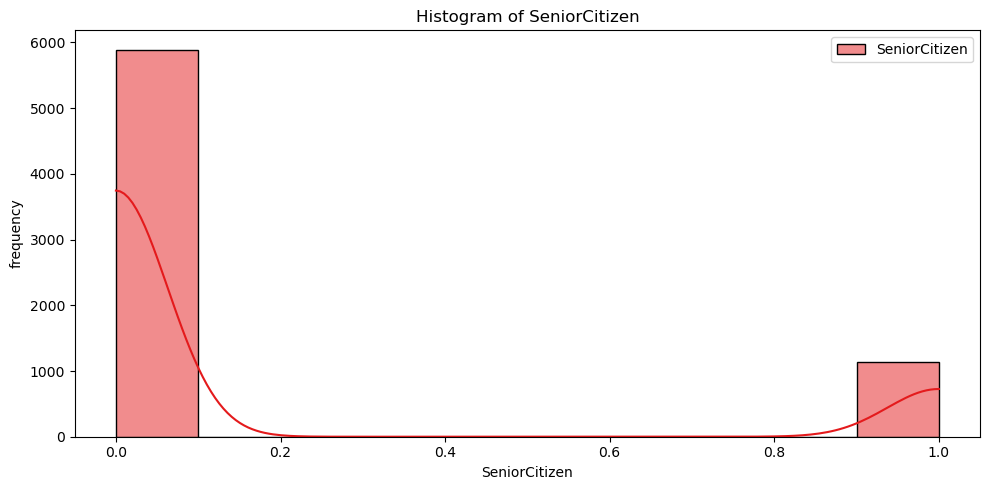

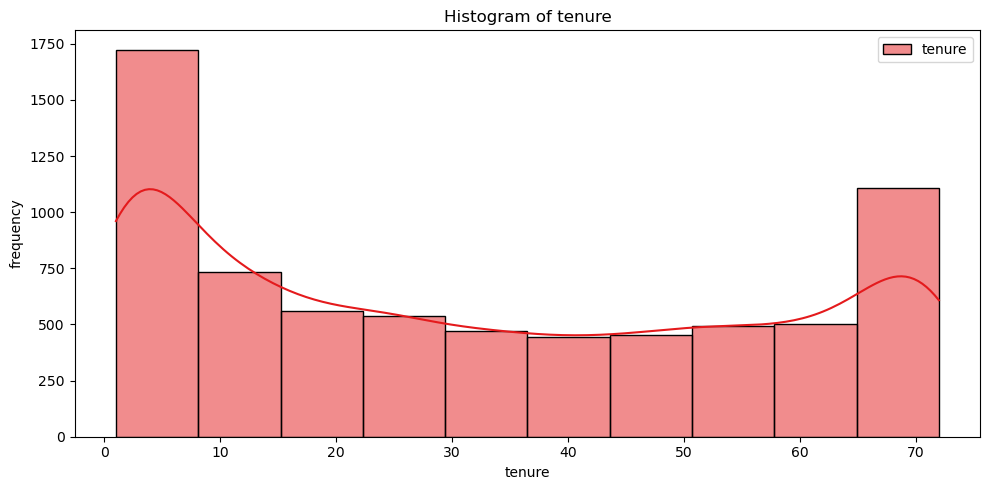

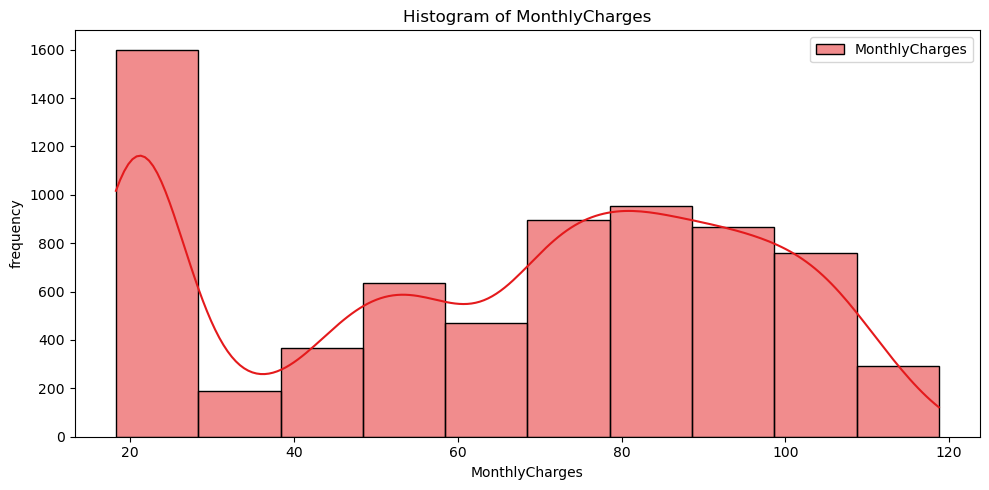

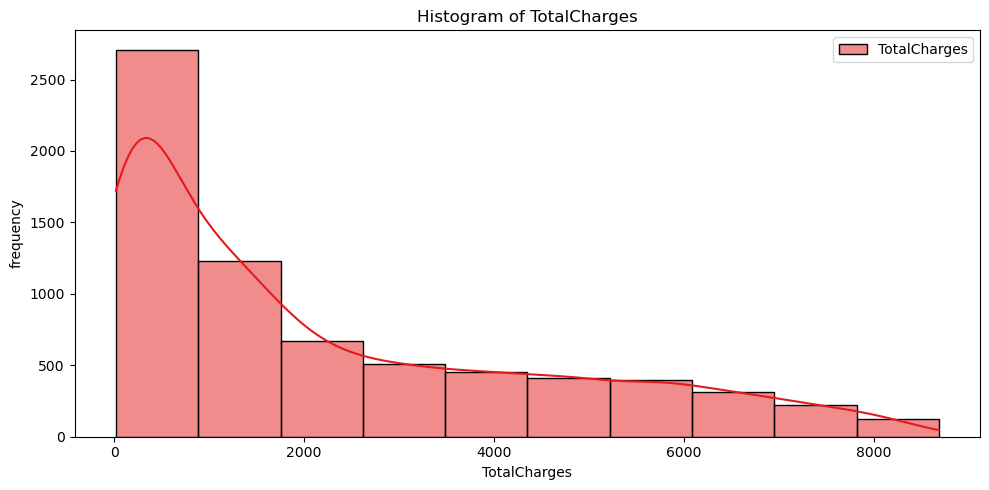

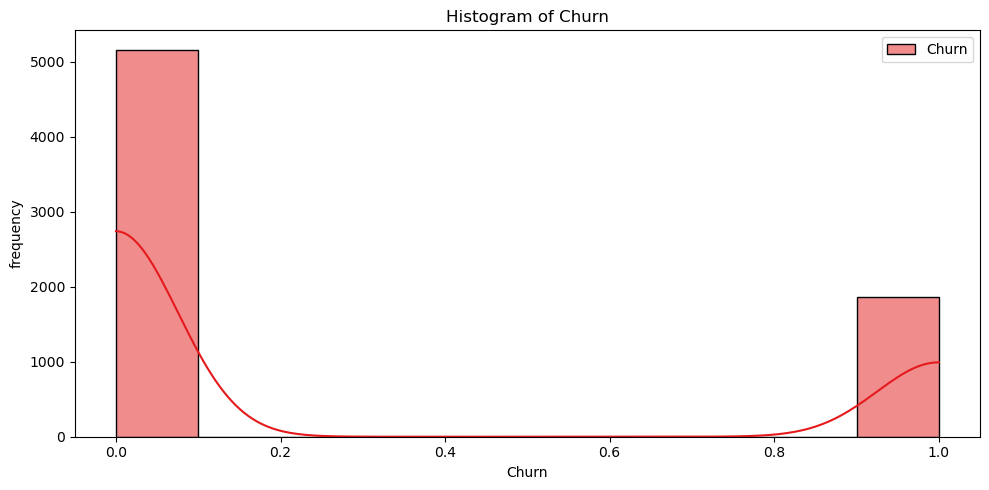

In [25]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='Set1', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

### 2. Countplot Of Cat_Cols

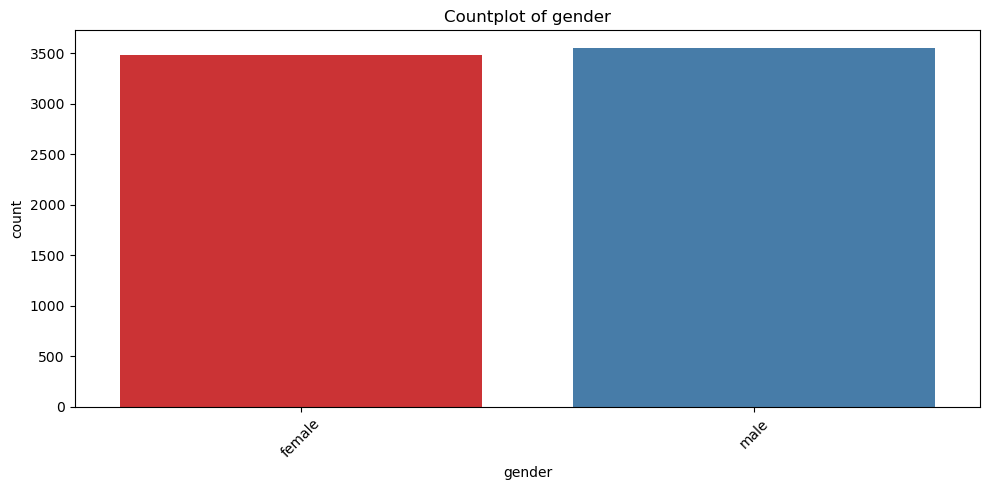

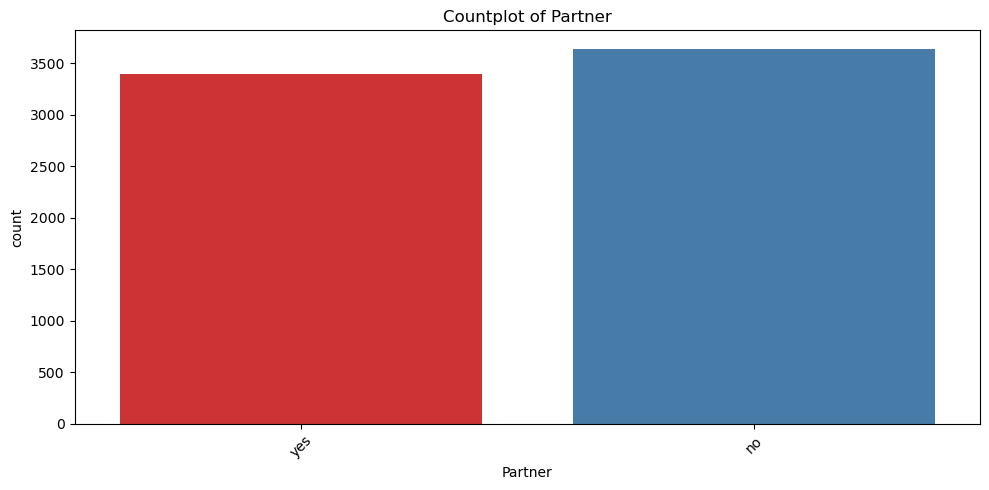

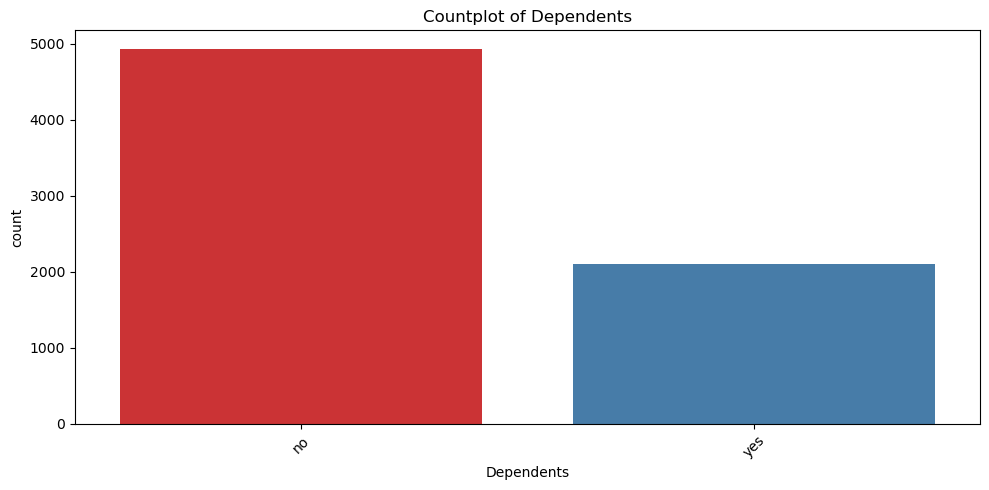

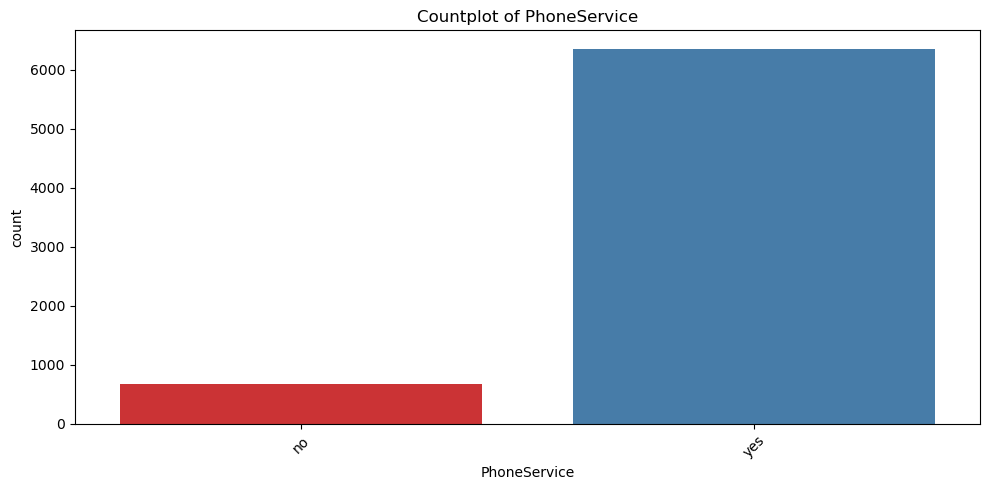

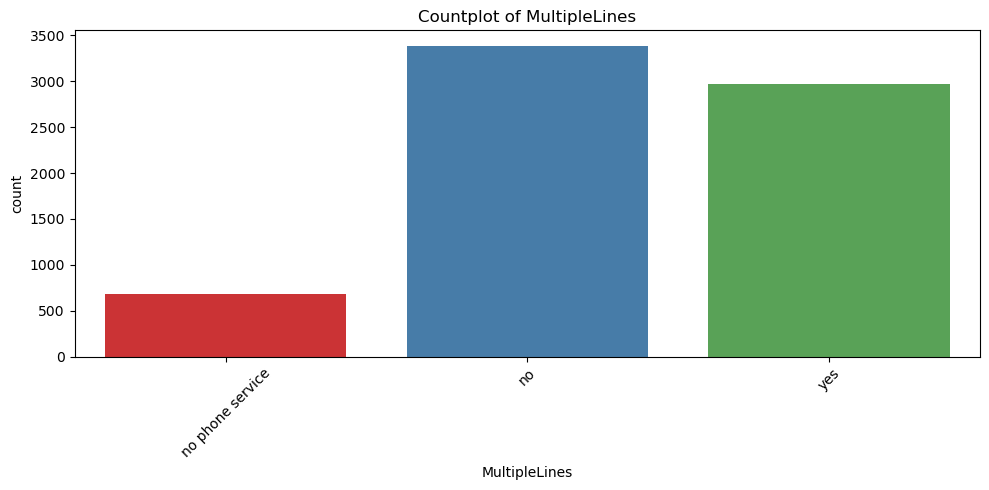

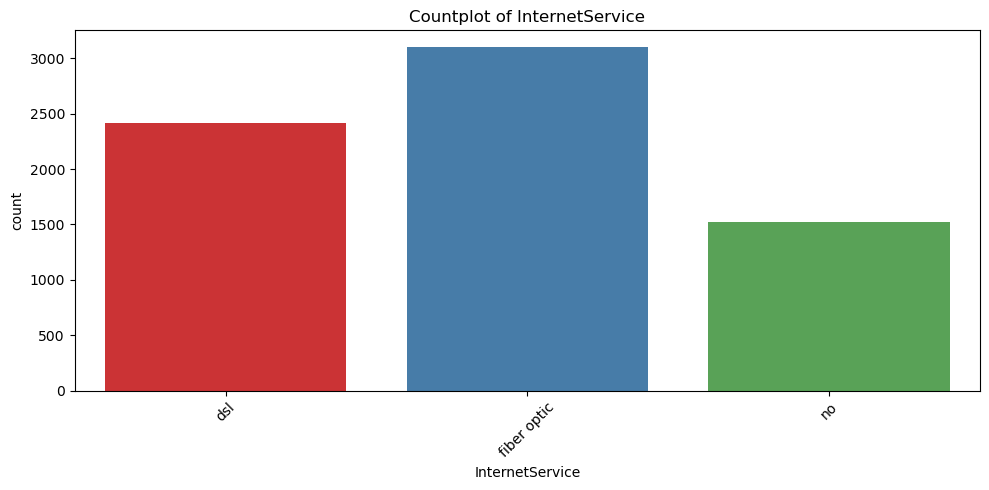

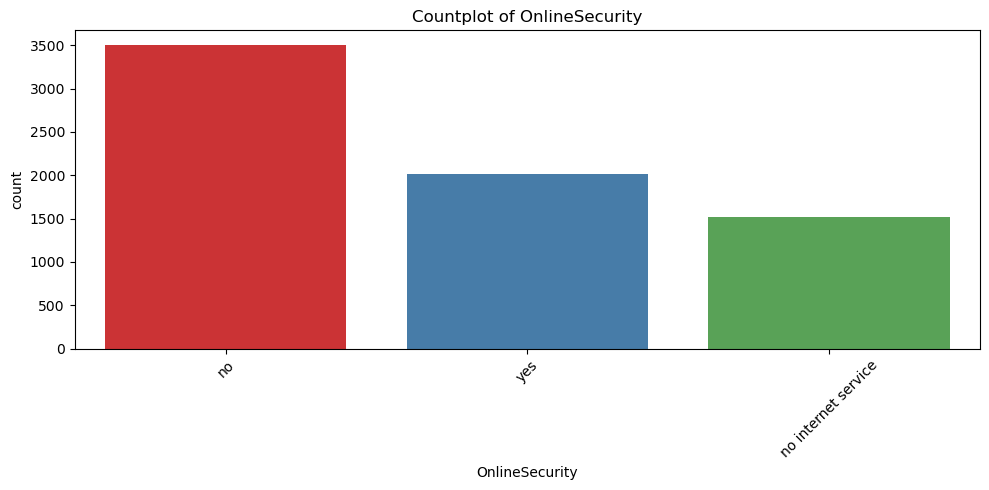

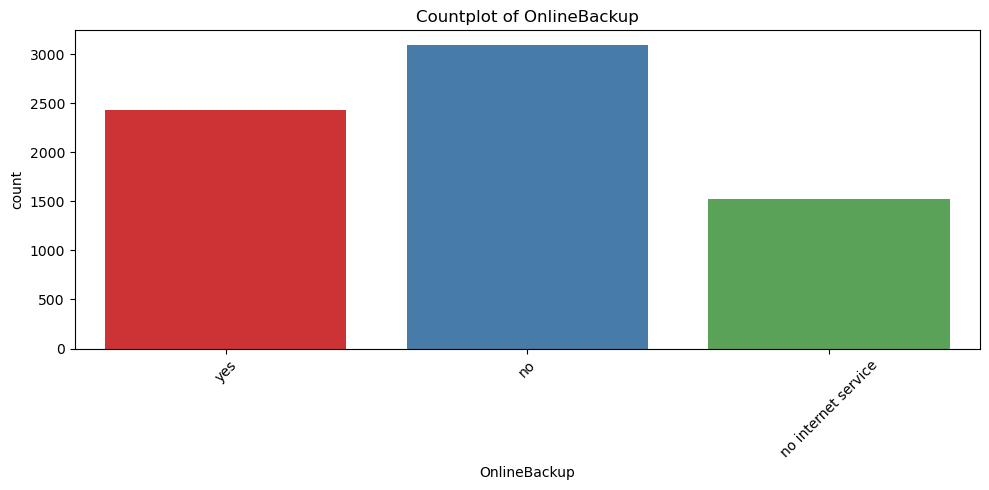

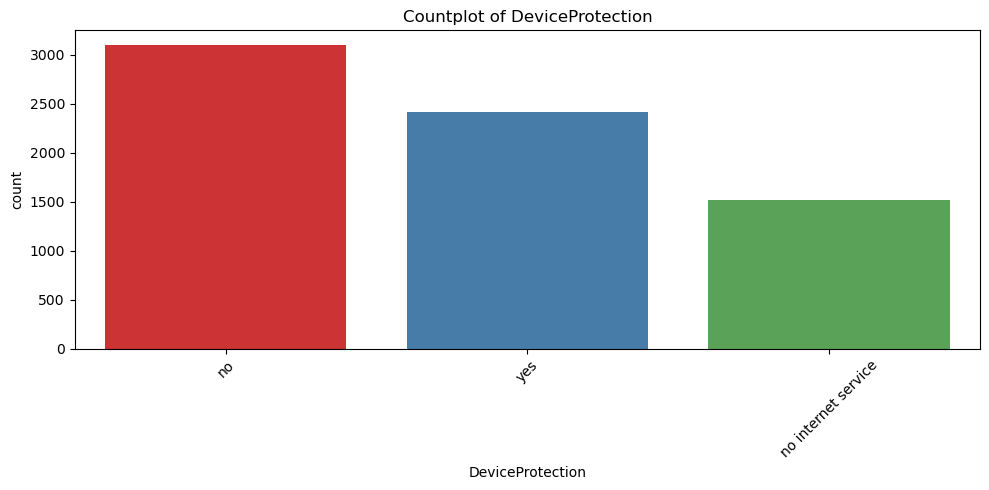

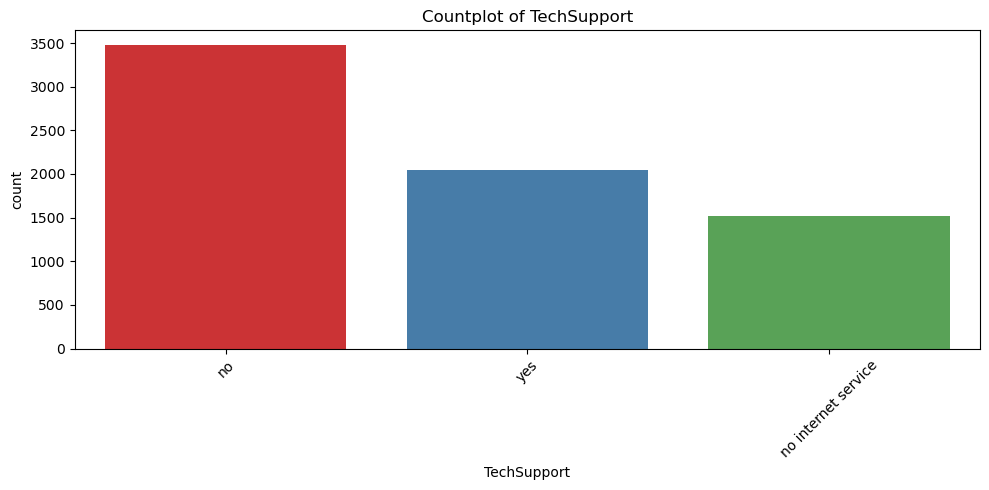

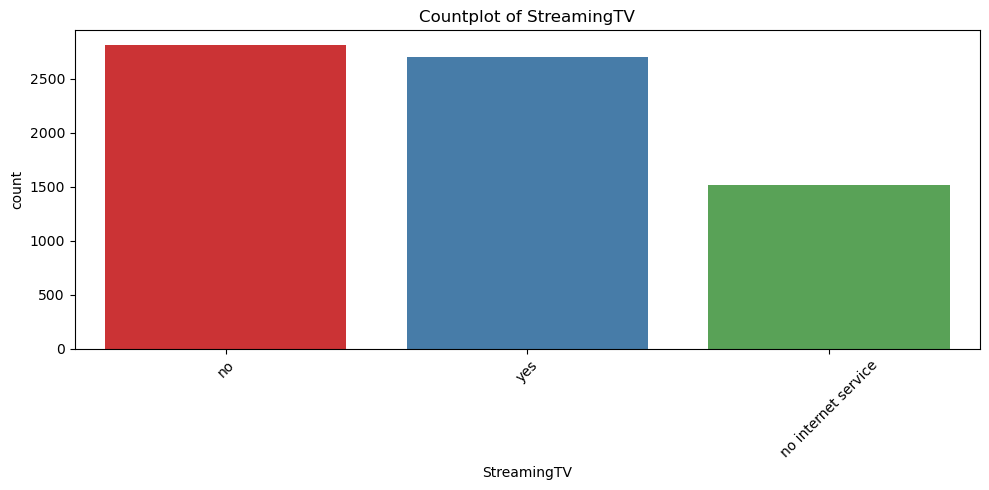

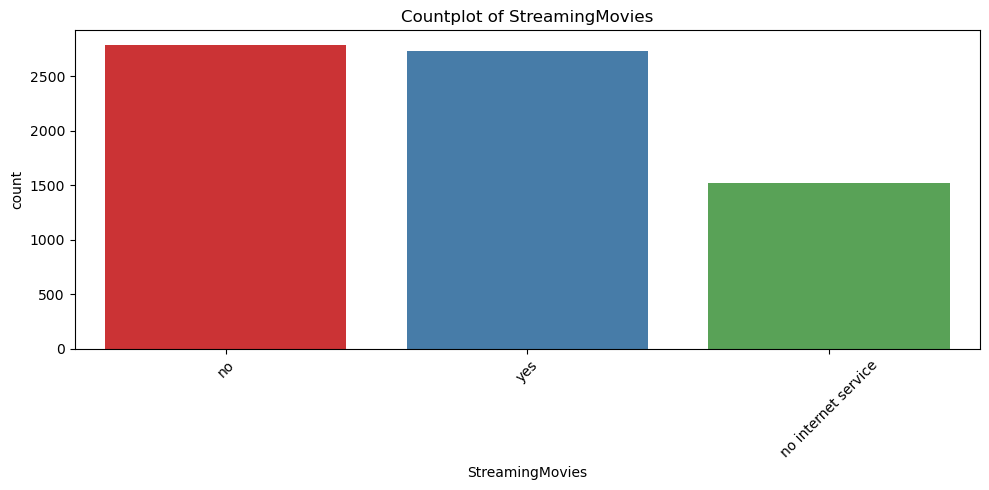

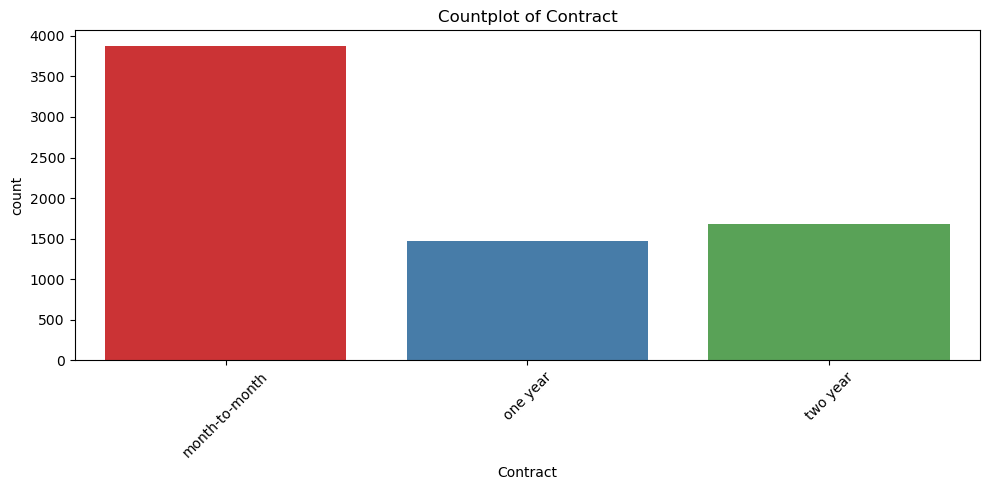

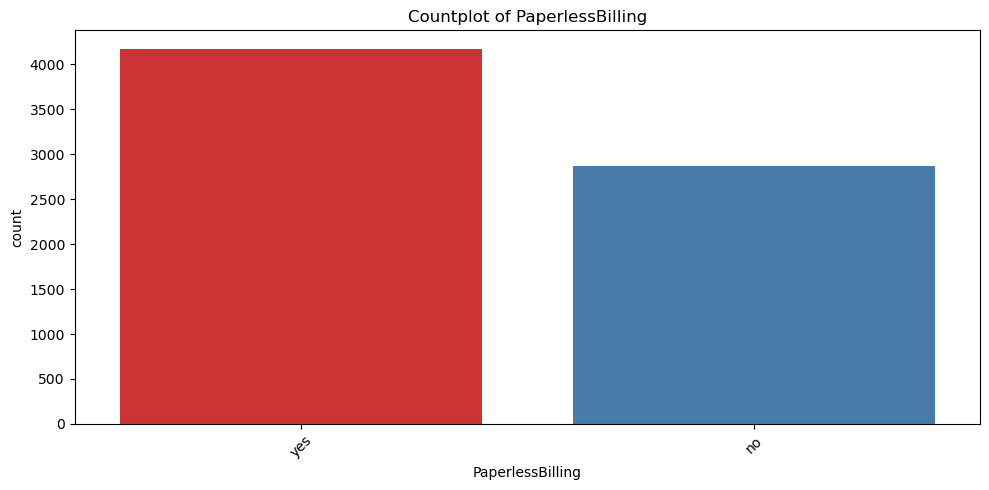

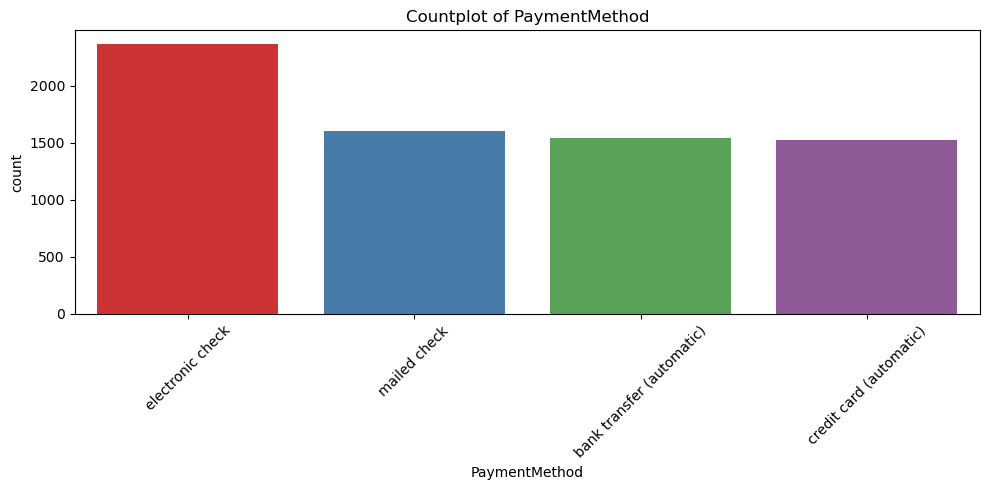

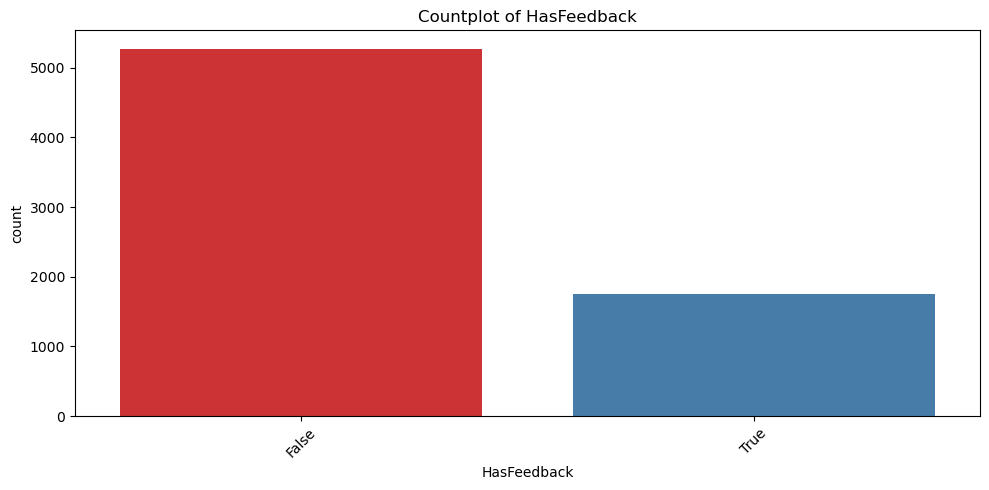

In [26]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set1')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Monthly & Total Charges by Contract

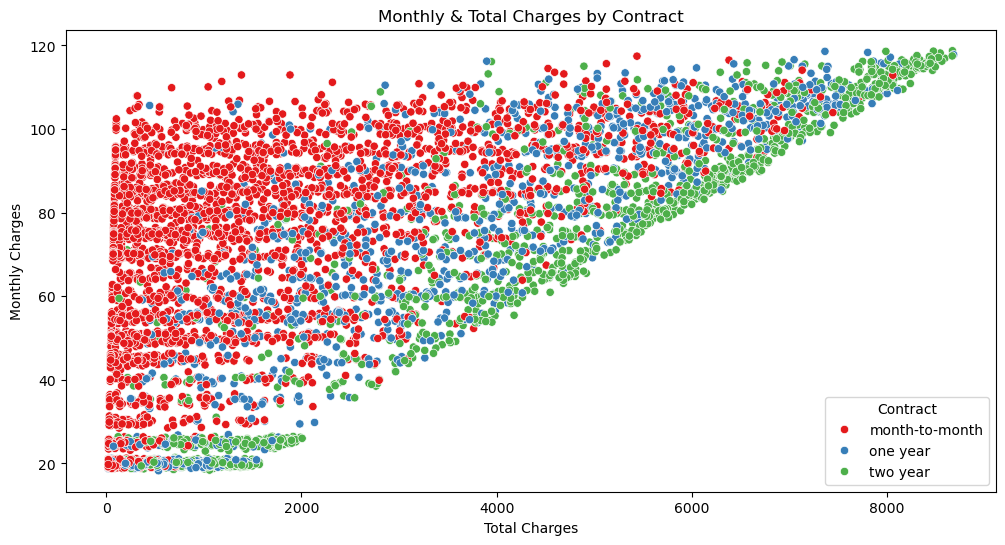

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['TotalCharges'], y=df['MonthlyCharges'], hue=df['Contract'], palette='Set1')
plt.title('Monthly & Total Charges by Contract')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()

### 4. Monthly & Total Charges by Gender

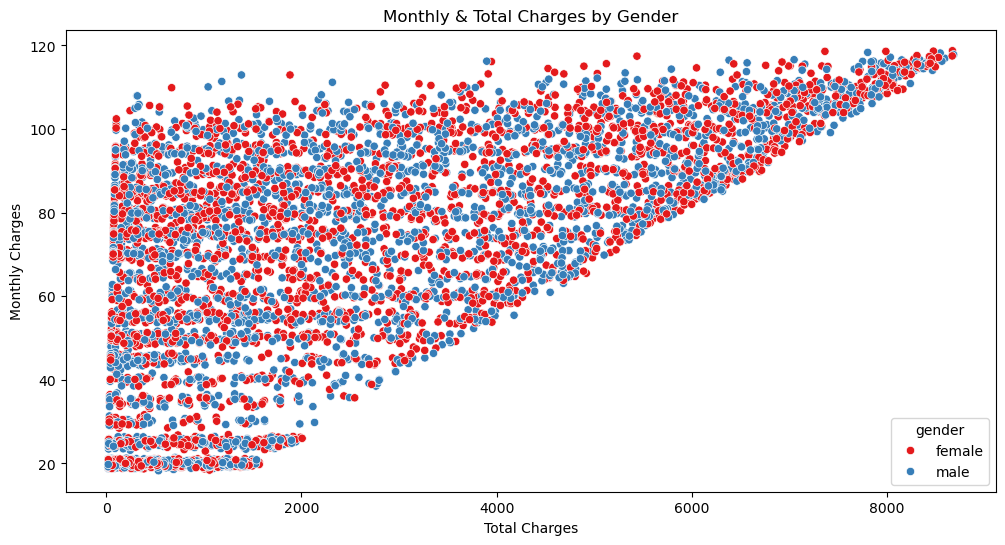

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['TotalCharges'], y=df['MonthlyCharges'], hue=df['gender'], palette='Set1')
plt.title('Monthly & Total Charges by Gender')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()

### 5. Monthly Charges by Payment Method

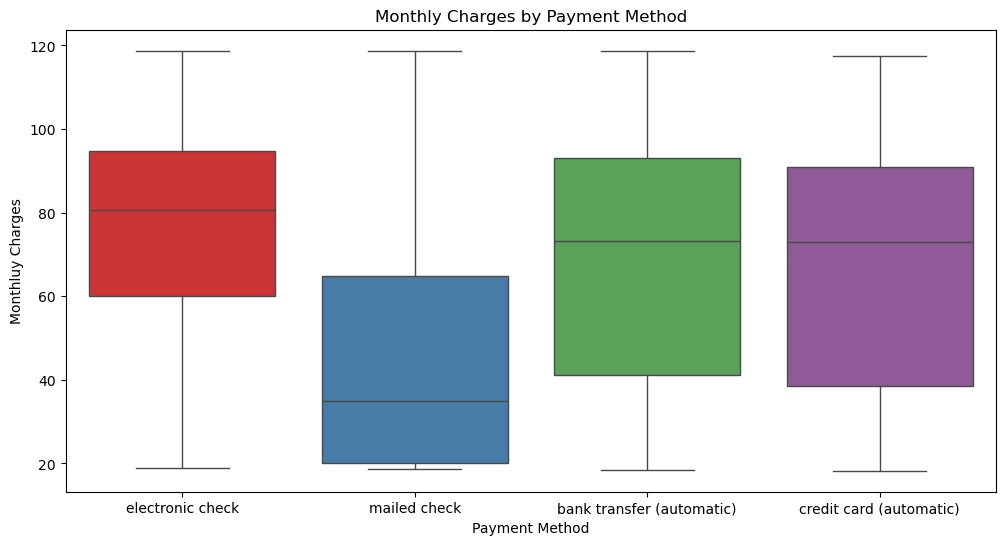

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['PaymentMethod'], y=df['MonthlyCharges'], data=df, palette='Set1')
plt.title('Monthly Charges by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Monthluy Charges')
plt.show()

### 6. Payment Method by Contract

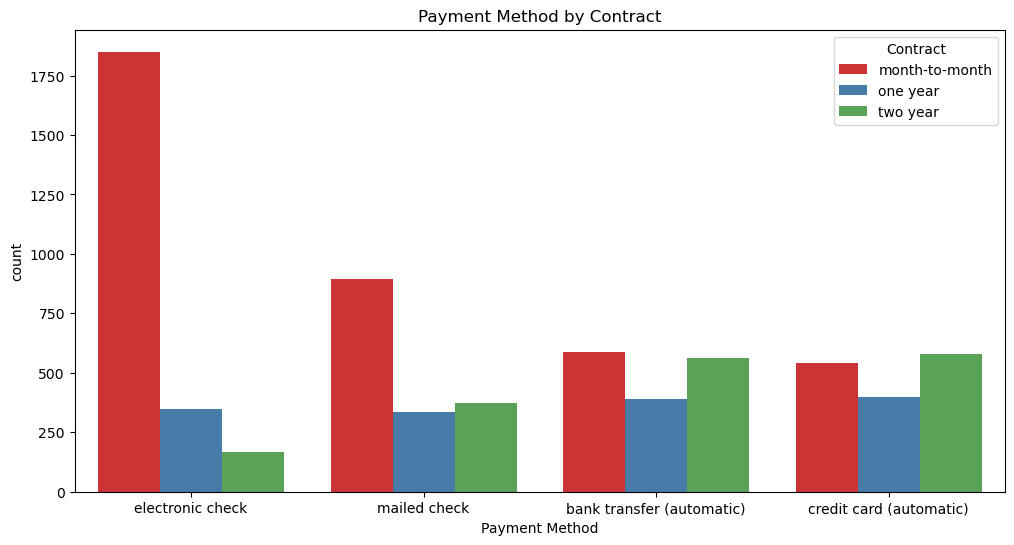

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['PaymentMethod'], hue=df['Contract'], palette='Set1')
plt.title('Payment Method by Contract')
plt.xlabel('Payment Method')
plt.ylabel('count')
plt.legend(title='Contract')
plt.show()

### 7. Payment Method by Internet Service

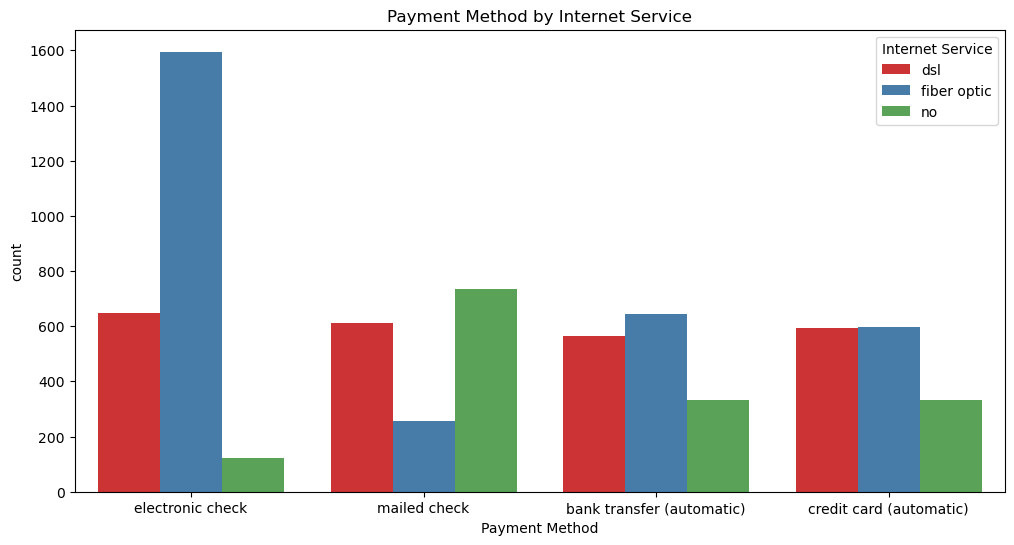

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['PaymentMethod'], hue=df['InternetService'], palette='Set1')
plt.title('Payment Method by Internet Service')
plt.xlabel('Payment Method')
plt.ylabel('count')
plt.legend(title='Internet Service')
plt.show()

### 8. Churn vs Has Feedback

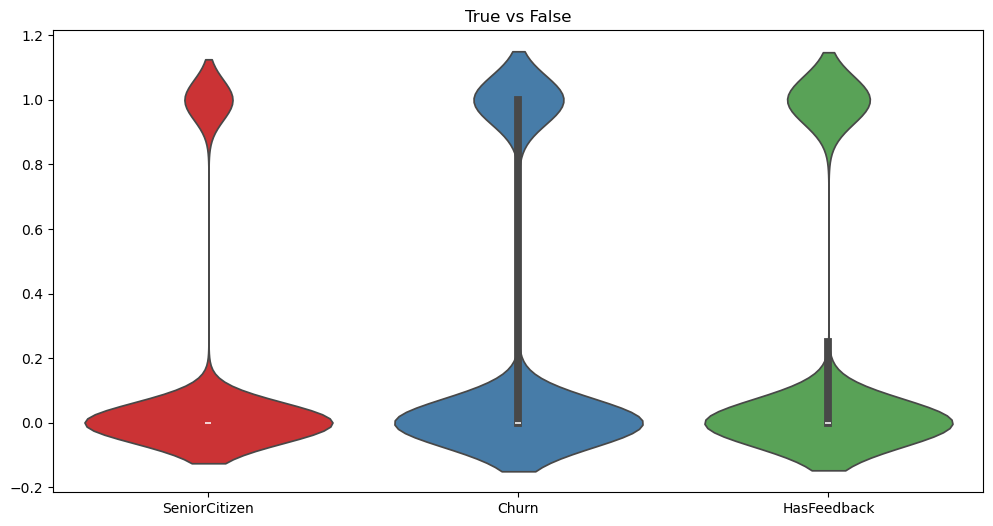

In [39]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['SeniorCitizen','Churn','HasFeedback']], palette='Set1')
plt.title('True vs False')
plt.show()

### 9. Correlation Heat Map

In [41]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [42]:
df['Partner'].unique()

array(['yes', 'no'], dtype=object)

In [43]:
df['Dependents'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
df['PhoneService'].unique()

array(['no', 'yes'], dtype=object)

In [45]:
df['MultipleLines'].unique()

array(['no phone service', 'no', 'yes'], dtype=object)

In [46]:
df['InternetService'].unique()

array(['dsl', 'fiber optic', 'no'], dtype=object)

In [47]:
df['OnlineSecurity'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

In [48]:
df['OnlineBackup'].unique()

array(['yes', 'no', 'no internet service'], dtype=object)

In [49]:
df['DeviceProtection'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

In [50]:
df['TechSupport'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

In [51]:
df['StreamingTV'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

In [52]:
df['StreamingMovies'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

In [53]:
df['Contract'].unique()

array(['month-to-month', 'one year', 'two year'], dtype=object)

In [54]:
df['PaperlessBilling'].unique()

array(['yes', 'no'], dtype=object)

In [55]:
df['PaymentMethod'].unique()

array(['electronic check', 'mailed check', 'bank transfer (automatic)',
       'credit card (automatic)'], dtype=object)

In [56]:
df['HasFeedback'].unique()

array([False,  True])

In [57]:
df = df.drop('customerID', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,feedback_length,sentiment,HasFeedback
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,...,month-to-month,yes,electronic check,29.85,29.85,0,0,0,0.0,False
1,male,0,no,no,34,yes,no,dsl,yes,no,...,one year,no,mailed check,56.95,1889.50,0,0,0,0.0,False
2,male,0,no,no,2,yes,no,dsl,yes,yes,...,month-to-month,yes,mailed check,53.85,108.15,1,0,0,0.0,False
3,male,0,no,no,45,no,no phone service,dsl,yes,no,...,one year,no,bank transfer (automatic),42.30,1840.75,0,0,0,0.0,False
4,female,0,no,no,2,yes,no,fiber optic,no,no,...,month-to-month,yes,electronic check,70.70,151.65,1,0,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,female,0,no,no,1,yes,no,fiber optic,no,no,...,month-to-month,yes,electronic check,70.10,70.10,1,0,0,0.0,False
7028,female,0,yes,yes,72,yes,yes,dsl,yes,yes,...,two year,no,credit card (automatic),89.75,6595.90,0,0,0,0.0,False
7029,male,1,yes,no,60,yes,no,fiber optic,no,yes,...,one year,yes,electronic check,97.95,5867.00,0,0,0,0.0,False
7030,female,0,yes,yes,11,yes,no,no,no internet service,no internet service,...,one year,yes,mailed check,20.00,196.35,0,0,0,0.0,False


In [58]:
val = {'gender': {'female': 0, 'male': 1}, 
       'Partner': {'no': 0, 'yes': 1},
       'Dependents': {'no': 0, 'yes': 1},
       'Partner': {'no': 0, 'yes': 1},
       'PhoneService': {'no': 0, 'yes': 1},
       'MultipleLines': {'no': 0, 'yes': 1},
       'InternetService': {'no': 0, 'fiber optic': 1, 'dsl': 2},
       'OnlineSecurity': {'no': 0, 'yes': 1},
       'OnlineBackup': {'no': 0, 'yes': 1},
       'DeviceProtection': {'no': 0, 'yes': 1},
       'TechSupport': {'no': 0, 'yes': 1},
       'StreamingTV': {'no': 0, 'yes': 1},
       'StreamingMovies': {'no': 0, 'yes': 1},
       'Contract': {'month-to-month': 0, 'one year': 1, 'two year': 2},
       'PaperlessBilling': {'no': 0, 'yes': 1},
       'PaymentMethod': {'electronic check': 0, 'mailed check': 1, 'bank transfer (automatic)': 2, 'credit card (automatic)': 3},
       'HasFeedback': {'False': 0, 'True': 1}}
df.replace(val, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,feedback_length,sentiment,HasFeedback
0,0,0,1,0,1,0,no phone service,2,0,1,...,0,1,0,29.85,29.85,0,0,0,0.0,False
1,1,0,0,0,34,1,0,2,1,0,...,1,0,1,56.95,1889.50,0,0,0,0.0,False
2,1,0,0,0,2,1,0,2,1,1,...,0,1,1,53.85,108.15,1,0,0,0.0,False
3,1,0,0,0,45,0,no phone service,2,1,0,...,1,0,2,42.30,1840.75,0,0,0,0.0,False
4,0,0,0,0,2,1,0,1,0,0,...,0,1,0,70.70,151.65,1,0,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,1,1,0,1,0,0,...,0,1,0,70.10,70.10,1,0,0,0.0,False
7028,0,0,1,1,72,1,1,2,1,1,...,2,0,3,89.75,6595.90,0,0,0,0.0,False
7029,1,1,1,0,60,1,0,1,0,1,...,1,1,0,97.95,5867.00,0,0,0,0.0,False
7030,0,0,1,1,11,1,0,0,no internet service,no internet service,...,1,1,1,20.00,196.35,0,0,0,0.0,False


In [60]:
val = {'MultipleLines': {'no phone service': 0},
       'OnlineSecurity': {'no internet service': 0},
       'OnlineBackup': {'no internet service': 0},
       'DeviceProtection': {'no internet service': 0},
       'TechSupport': {'no internet service': 0},
       'StreamingTV': {'no internet service': 0},
       'StreamingMovies': {'no internet service': 0}}
df.replace(val, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,feedback_length,sentiment,HasFeedback
0,0,0,1,0,1,0,0,2,0,1,...,0,1,0,29.85,29.85,0,0,0,0.0,False
1,1,0,0,0,34,1,0,2,1,0,...,1,0,1,56.95,1889.50,0,0,0,0.0,False
2,1,0,0,0,2,1,0,2,1,1,...,0,1,1,53.85,108.15,1,0,0,0.0,False
3,1,0,0,0,45,0,0,2,1,0,...,1,0,2,42.30,1840.75,0,0,0,0.0,False
4,0,0,0,0,2,1,0,1,0,0,...,0,1,0,70.70,151.65,1,0,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,1,1,0,1,0,0,...,0,1,0,70.10,70.10,1,0,0,0.0,False
7028,0,0,1,1,72,1,1,2,1,1,...,2,0,3,89.75,6595.90,0,0,0,0.0,False
7029,1,1,1,0,60,1,0,1,0,1,...,1,1,0,97.95,5867.00,0,0,0,0.0,False
7030,0,0,1,1,11,1,0,0,0,0,...,1,1,1,20.00,196.35,0,0,0,0.0,False


In [62]:
df = df.drop('CustomerFeedback', axis=1)
df = df.drop('feedback_length', axis=1)
df = df.drop('sentiment', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasFeedback
0,0,0,1,0,1,0,0,2,0,1,...,0,0,0,0,1,0,29.85,29.85,0,False
1,1,0,0,0,34,1,0,2,1,0,...,0,0,0,1,0,1,56.95,1889.50,0,False
2,1,0,0,0,2,1,0,2,1,1,...,0,0,0,0,1,1,53.85,108.15,1,False
3,1,0,0,0,45,0,0,2,1,0,...,1,0,0,1,0,2,42.30,1840.75,0,False
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,0,70.70,151.65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,70.10,70.10,1,False
7028,0,0,1,1,72,1,1,2,1,1,...,1,1,1,2,0,3,89.75,6595.90,0,False
7029,1,1,1,0,60,1,0,1,0,1,...,0,1,1,1,1,0,97.95,5867.00,0,False
7030,0,0,1,1,11,1,0,0,0,0,...,0,0,0,1,1,1,20.00,196.35,0,False


In [63]:
correlation = df.corr()

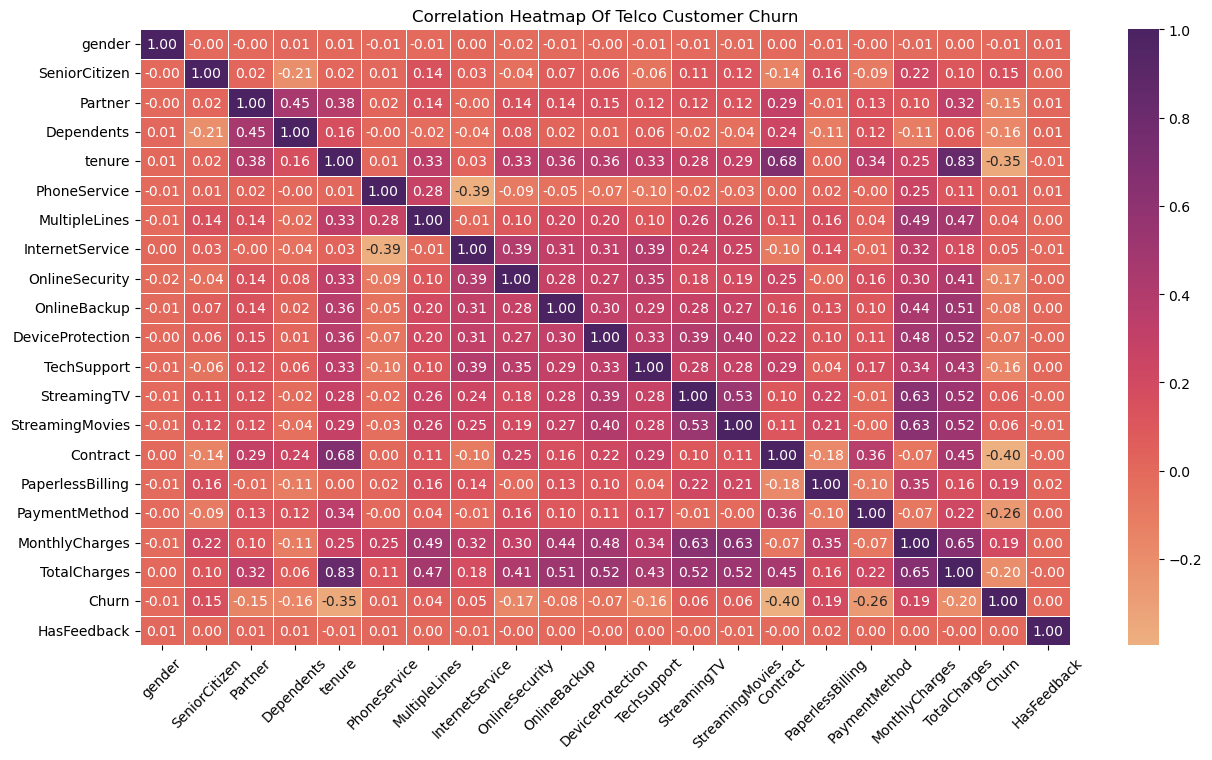

In [65]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='flare', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Telco Customer Churn')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [66]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasFeedback
0,0,0,1,0,1,0,0,2,0,1,...,0,0,0,0,1,0,29.85,29.85,0,False
1,1,0,0,0,34,1,0,2,1,0,...,0,0,0,1,0,1,56.95,1889.50,0,False
2,1,0,0,0,2,1,0,2,1,1,...,0,0,0,0,1,1,53.85,108.15,1,False
3,1,0,0,0,45,0,0,2,1,0,...,1,0,0,1,0,2,42.30,1840.75,0,False
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,0,70.70,151.65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,70.10,70.10,1,False
7028,0,0,1,1,72,1,1,2,1,1,...,1,1,1,2,0,3,89.75,6595.90,0,False
7029,1,1,1,0,60,1,0,1,0,1,...,0,1,1,1,1,0,97.95,5867.00,0,False
7030,0,0,1,1,11,1,0,0,0,0,...,0,0,0,1,1,1,20.00,196.35,0,False


In [67]:
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod', 'HasFeedback' ]
target = 'Churn'

X = df[features]
y = df[target]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(5625, 20) (1407, 20)


### 2. Models

In [69]:
models = {
     'Random Forest Classifier': RandomForestClassifier(),
     'Logistic Regression': LogisticRegression(),
     'Linear Regression': LinearRegression(),
     'CatBoost': CatBoostRegressor(),
     'Random Forest': RandomForestRegressor(),
     'Decision Tree Classifier': DecisionTreeClassifier(),
     'Hist Gradient Boosting Classifier': HistGradientBoostingClassifier()
}

#### 2.1 Train and Evaluate Models

In [70]:
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Random Forest Classifier - RMSE: 0.4445, MAE: 0.1976
Logistic Regression - RMSE: 0.4299, MAE: 0.1848
Linear Regression - RMSE: 0.3680, MAE: 0.2939
Learning rate set to 0.05379
0:	learn: 0.4363272	total: 164ms	remaining: 2m 43s
1:	learn: 0.4305495	total: 166ms	remaining: 1m 23s
2:	learn: 0.4252121	total: 169ms	remaining: 56.2s
3:	learn: 0.4202438	total: 172ms	remaining: 42.8s
4:	learn: 0.4158225	total: 175ms	remaining: 34.7s
5:	learn: 0.4118363	total: 179ms	remaining: 29.7s
6:	learn: 0.4081251	total: 183ms	remaining: 26s
7:	learn: 0.4048326	total: 187ms	remaining: 23.1s
8:	learn: 0.4016039	total: 194ms	remaining: 21.4s
9:	learn: 0.3988383	total: 198ms	remaining: 19.6s
10:	learn: 0.3963082	total: 201ms	remaining: 18.1s
11:	learn: 0.3944188	total: 204ms	remaining: 16.8s
12:	learn: 0.3921707	total: 208ms	remaining: 15.8s
13:	learn: 0.3901625	total: 211ms	remaining: 14.9s
14:	learn: 0.3883521	total: 214ms	remaining: 14.1s
15:	learn: 0.3865545	total: 217ms	remaining: 13.3s
16:	learn: 0.38501

### 2.2 Visualize Model Performance

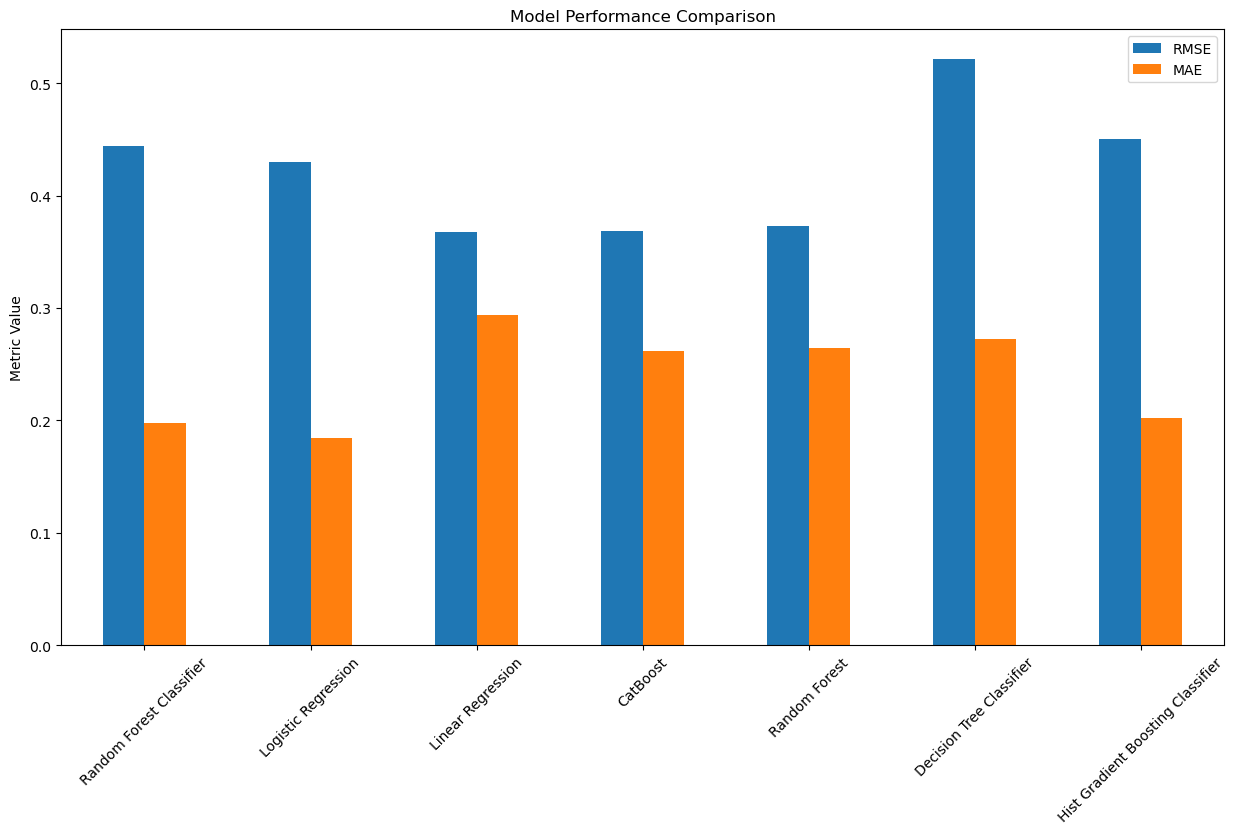

In [71]:
plt.figure(figsize=(15, 8))
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()